In [25]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data Loading and Cleaning: Load the retail sales dataset.
Descriptive Statistics: Calculate basic statistics (mean, median, mode, standard deviation).
Time Series Analysis: Analyze sales trends over time using time series techniques.
Customer and Product Analysis: Analyze customer demographics and purchasing behavior.
Visualization: Present insights through bar charts, line plots, and heatmaps.
Recommendations: Provide actionable recommendations based on the EDA.

Data Loading and Cleaning: Load the retail sales dataset.

In [26]:
df = pd.read_csv(r"G:\Projects\Data_Analysis_with_Python\Retail_Sales_Dataset\retail_sales_dataset.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [ ]:
df.info()

In [ ]:
df.describe()

In [44]:
df['Date']= pd.to_datetime(df['Date'])

In [ ]:
df.isna().sum()

In [ ]:
df.duplicated().sum()

Descriptive Statistics

In [ ]:
int_columns = df.select_dtypes(include='int64').columns
for column in int_columns:
    mean_value = df[column].mean()
    median_value = df[column].median()
    mode_value = df[column].mode().iloc[0]  # Getting the first mode value
    std_value = df[column].std()
    
    print(f"{column}: mean = {mean_value}, median = {median_value}, mode = {mode_value}, STD = {std_value}")

Detect outliers

In [ ]:
for column in int_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    # Print the results
    print(f"Outliers in {column}:")
    print(outliers[[column]])
    print(f"Number of outliers: {len(outliers)}\n")

Time Series Analysis

In [45]:
daily_sales = df.groupby('Date')['Total Amount'].sum().sort_values(ascending=False)
daily_sales.head()

Date
2023-05-23    8455
2023-05-16    7260
2023-06-24    6220
2023-02-17    5890
2023-08-05    5205
Name: Total Amount, dtype: int64

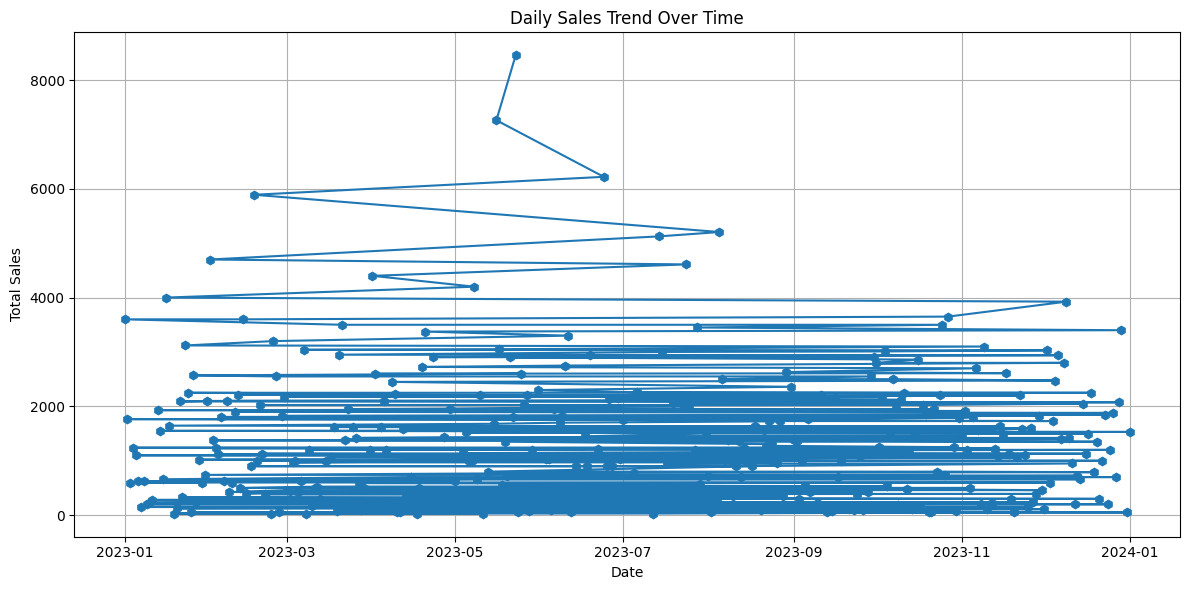

In [50]:
# Plotting the sales trend over time
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker='h')
plt.title('Daily Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Customer and Product Analysis

In [ ]:
cout_of_gender = df['Gender'].value_counts()
cout_of_gender

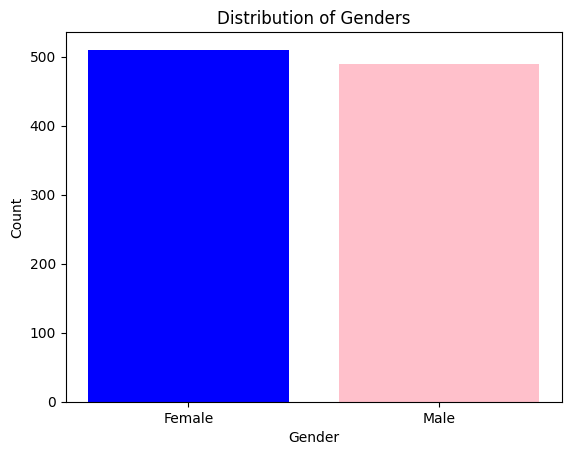

In [28]:
plt.bar(cout_of_gender.index, cout_of_gender.values, color=['blue', 'pink'])
plt.title('Distribution of Genders')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

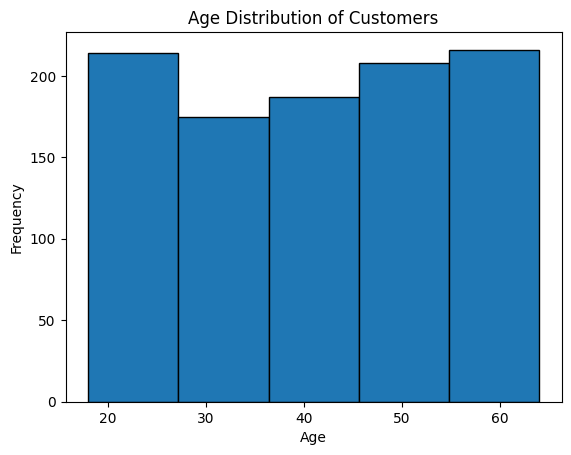

In [29]:

plt.hist(df['Age'], bins=5, edgecolor='k')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#top 5 Total Sales by Customer
total_sales_per_customer = df.groupby('Customer ID')['Total Amount'].sum().sort_values(ascending=False).reset_index()
print(total_sales_per_customer.head())

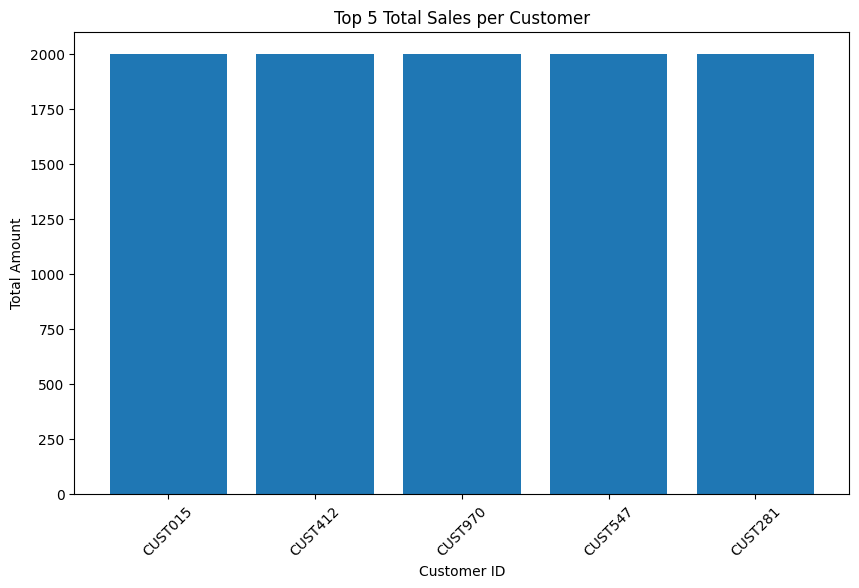

In [39]:
# drow Top 5 Total Sales per Customer
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_customer['Customer ID'].head(), total_sales_per_customer['Total Amount'].head())
plt.xlabel('Customer ID')
plt.ylabel('Total Amount')
plt.title('Top 5 Total Sales per Customer')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
#Most Purchased Products
most_purchased_products = df.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).reset_index()
print(most_purchased_products)

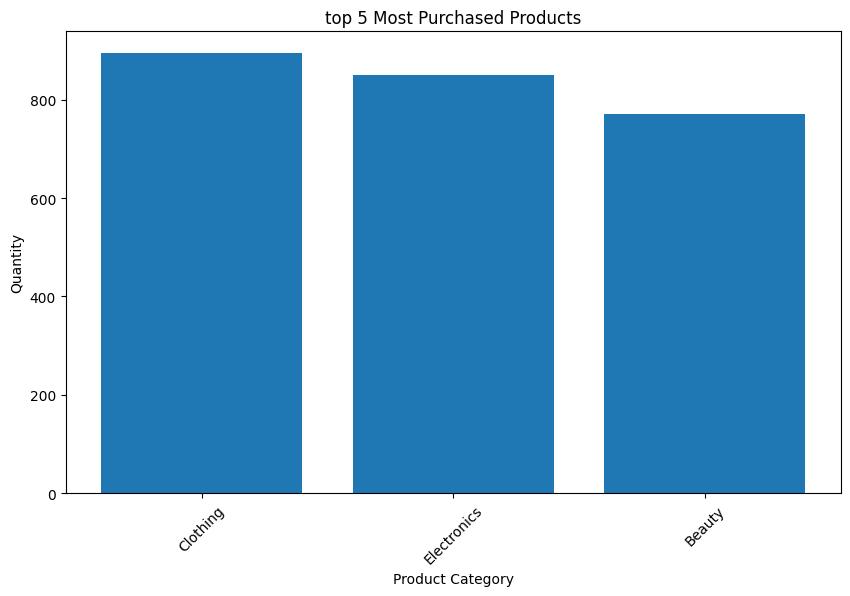

In [40]:
#drow top 5 Most Purchased Products
plt.figure(figsize=(10, 6))
plt.bar(most_purchased_products['Product Category'].head(), most_purchased_products['Quantity'].head())
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.title('top 5 Most Purchased Products')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
#top Sales by Product Category
total_sales_per_Product_Category  = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False).reset_index()
print(total_sales_per_Product_Category)


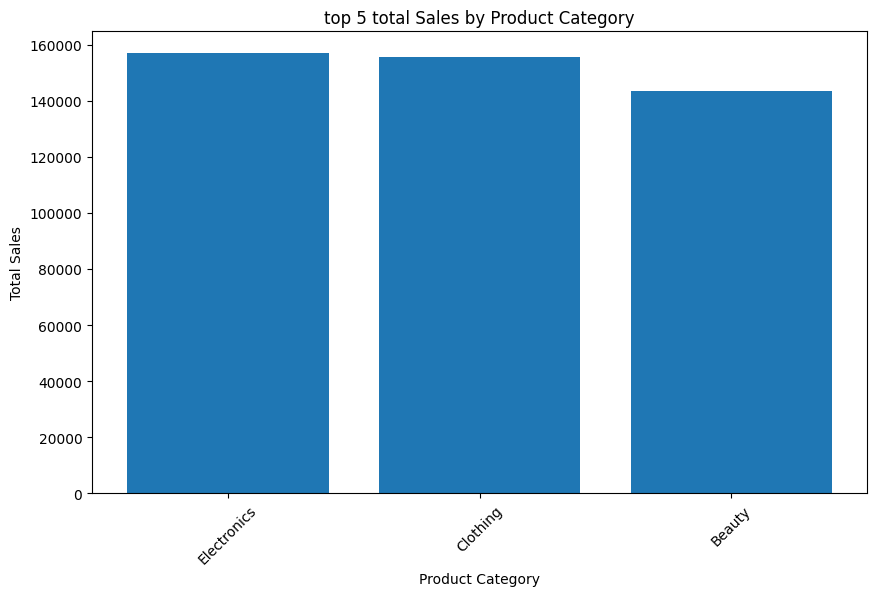

In [38]:
#drow top 5 total Sales by Product Category
plt.figure(figsize=(10, 6))
plt.bar(total_sales_per_Product_Category['Product Category'].head(), total_sales_per_Product_Category['Total Amount'].head())
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.title('top 5 total Sales by Product Category')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

In [ ]:
# number of products
num_of_products=df['Product Category'].value_counts()
num_of_products

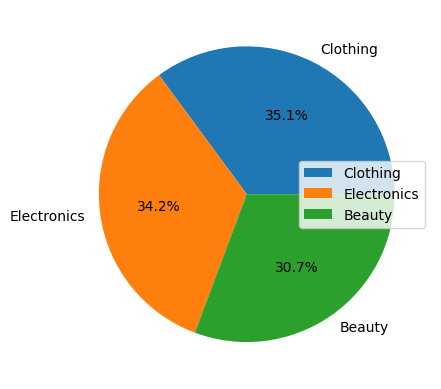

In [34]:

plt.pie(num_of_products.values,labels=num_of_products.index,autopct="%1.1f%%")
plt.legend(loc="center right")
plt.show()

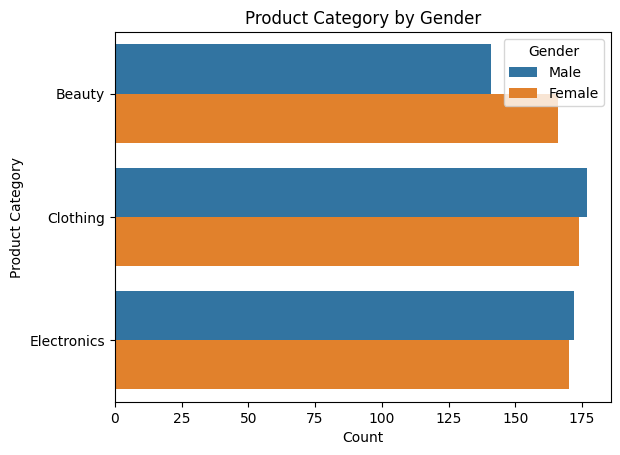

In [42]:
# Gender vs. Product Category
sns.countplot(data=df, y='Product Category', hue='Gender')
plt.title('Product Category by Gender')
plt.ylabel('Product Category')
plt.xlabel('Count')
plt.show()

In [ ]:
# sales by gender 
sales_by_gender = df.groupby('Gender')['Total Amount'].sum().reset_index()
sales_by_gender

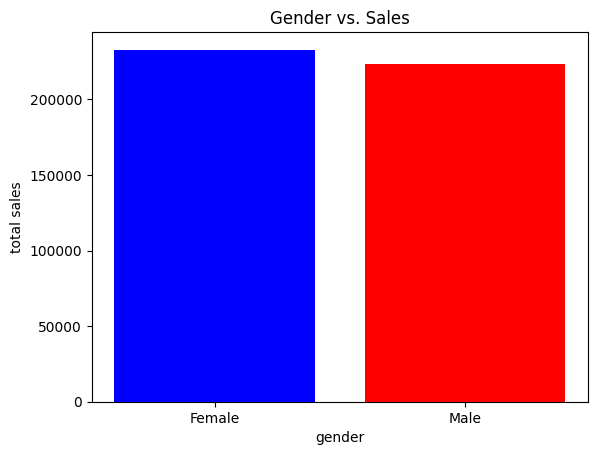

In [36]:
#Gender vs. Sales
plt.bar(sales_by_gender['Gender'],sales_by_gender['Total Amount'] ,color=['blue', 'red'])
plt.xlabel("gender")
plt.ylabel("total sales")
plt.title("Gender vs. Sales")
plt.show()

# Recommendations

1- Focus on May Sales: Pay attention to the month of May as it has the highest sales. Understanding and leveraging the  factors that contribute to this peak could help replicate similar results in other months.

2- Prioritize the Clothing Category: Clothes represent the most important category, so it's crucial to continue focusing on this area. Consider expanding offerings or implementing targeted marketing strategies to maintain and grow this segment.

3- Boost Beauty Product Sales: Since beauty product sales are lower, it's important to consider strategies like promotions or discounts to increase their appeal. This could help in improving their overall sales performance.

4- Target Female Customers: As women purchase more than men, developing campaigns and strategies that cater specifically to their preferences could further enhance sales and customer loyalty.